In [1]:
import numpy as np
np.random.seed(23)
from matplotlib import pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
from polyrand.rootfinder import *
from polyrand.polyrand import random_coeffs

%matplotlib inline

### Fractional Derivative

Let $G_{k,a} = \frac{\Gamma(k+1)}{\Gamma(k-a+1)}$

If $p(x)$ is a polynomial with coefficients $c_0,c_1,\ldots, c_n$ then the fractional derivative is:

$G_{k,a} c_n x^{k-a} + G_{k-1,a} c_{n-1} x^{k-1-a)} + \cdots$

$= x^{-a} (G_{k,a} c_n x^k + G_{k-1,a} c_{n-1} x^{k-1} + \cdots)$

for $a \in (0,1)$.

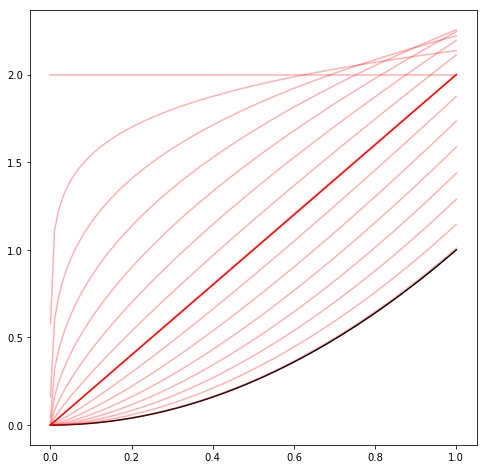

In [2]:
plot_frac_deriv_example()

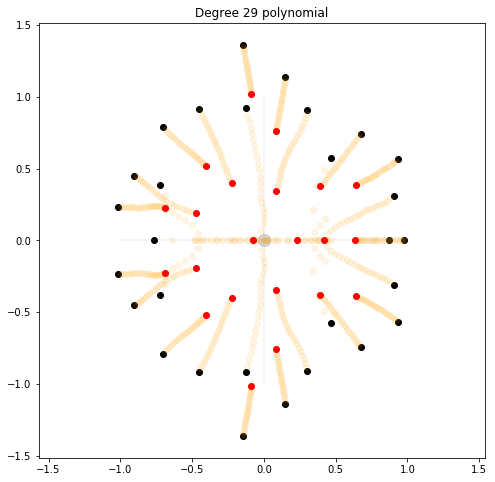

In [3]:
coeffs = np.random.randn(30)
coeffs[-1] = 1.
P = np.polynomial.polynomial.Polynomial(coeffs)
    
timelapse(P,0,7,25)

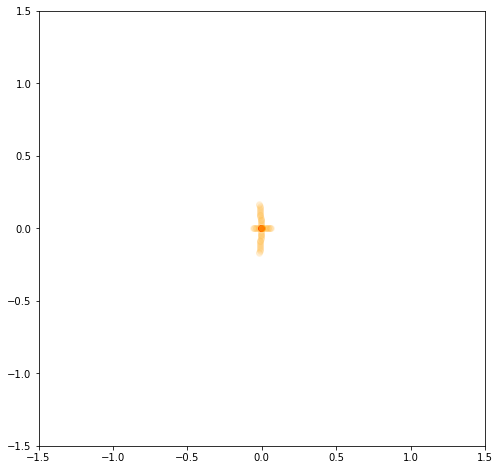

In [4]:
animate_roots(coeffs,0,28)

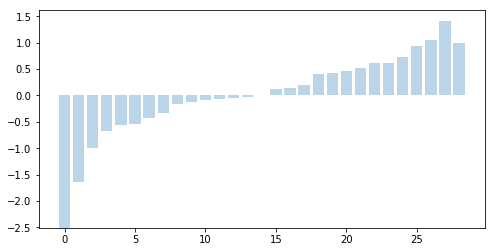

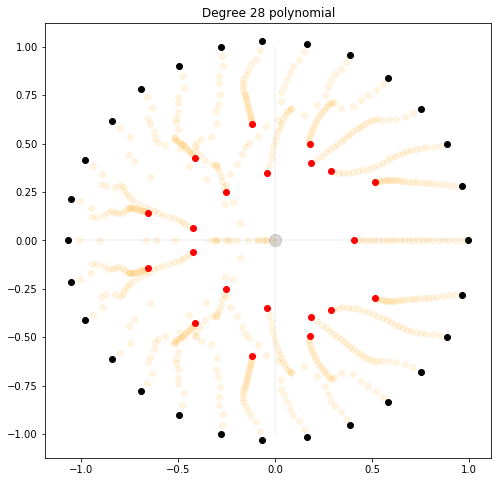

In [5]:
coeffs = np.random.randn(29)
coeffs = np.sort(coeffs)
coeffs[-1] = 1.
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(coeffs)),coeffs,alpha=.3)
plt.show()
P = np.polynomial.polynomial.Polynomial(coeffs)
    
timelapse(P,0,7,25)

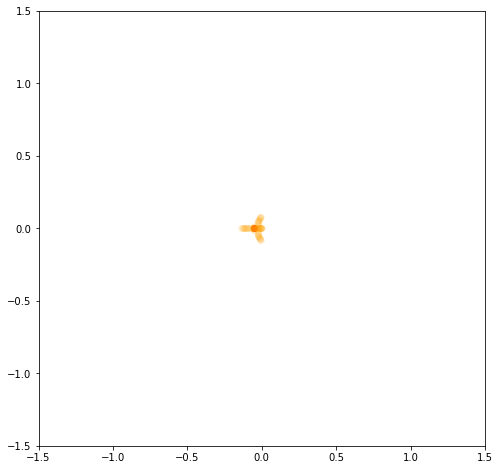

In [6]:
animate_roots(coeffs)

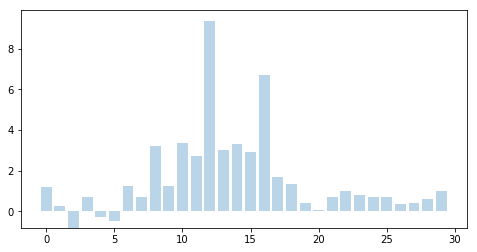

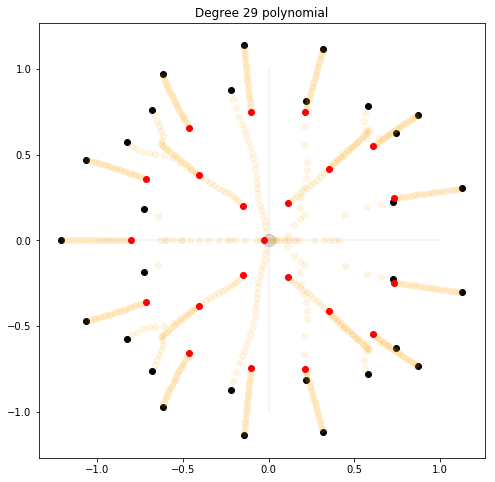

In [7]:
params = [('normal',[0,1],{'size':9}), ('gamma',[2,2],{'size':10}), ('beta',[.5,.5],{'size':10})]
coeffs = random_coeffs(params)

#coeffs = np.random.randn(30)
#coeffs = np.sort(coeffs)
assert coeffs[-1] == 1.
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(coeffs)),coeffs,alpha=.3)
plt.show()
P = np.polynomial.polynomial.Polynomial(coeffs)
    
timelapse(P,0,7,25)

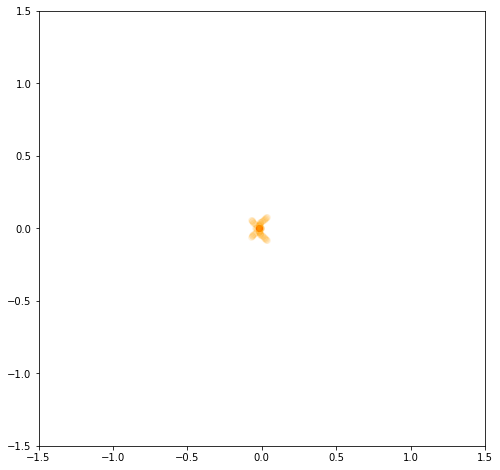

In [8]:
animate_roots(coeffs,0,28)

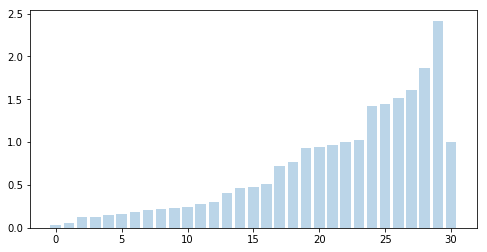

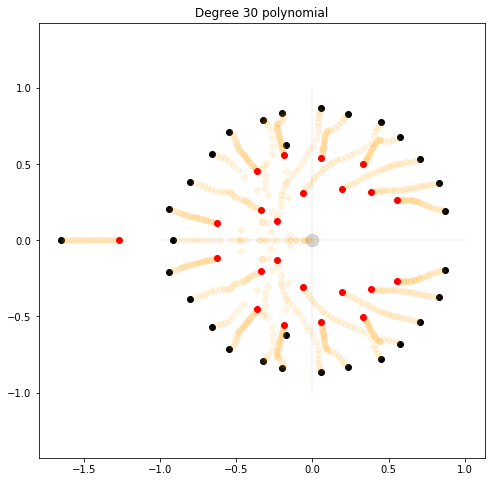

In [10]:
params = [('exponential',[1],{'size':30})]
coeffs = random_coeffs(params)

coeffs = np.sort(coeffs)
coeffs [-1] = 1.
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(coeffs)),coeffs,alpha=.3)
plt.show()
P = np.polynomial.polynomial.Polynomial(coeffs)
    
timelapse(P,0,7,25)

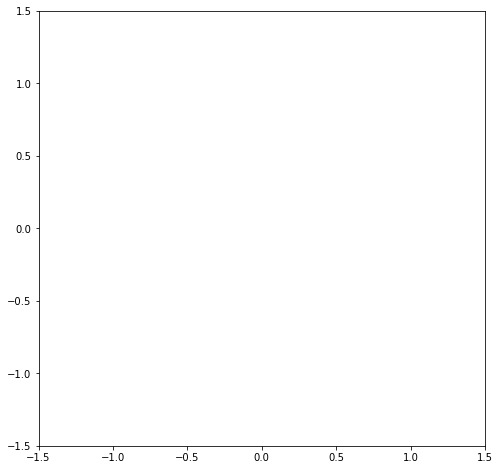

In [11]:
animate_roots(coeffs)

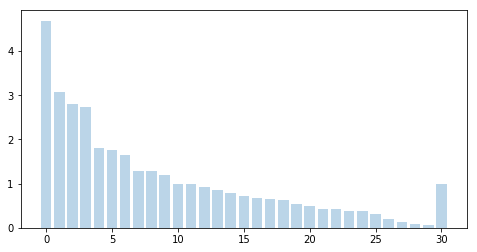

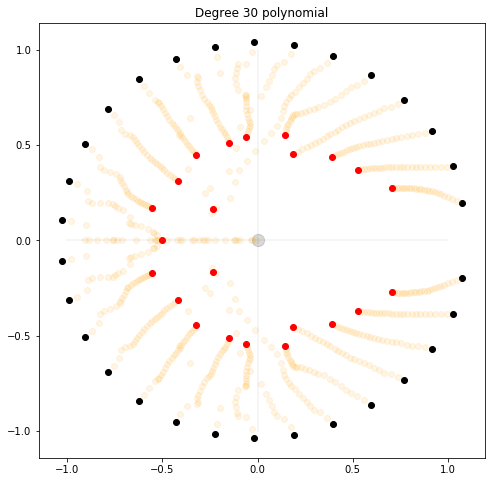

In [12]:
params = [('exponential',[1],{'size':30})]
coeffs = random_coeffs(params)

coeffs = np.sort(coeffs)[::-1]
coeffs [-1] = 1.
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(coeffs)),coeffs,alpha=.3)
plt.show()
P = np.polynomial.polynomial.Polynomial(coeffs)
    
timelapse(P,0,7,25)

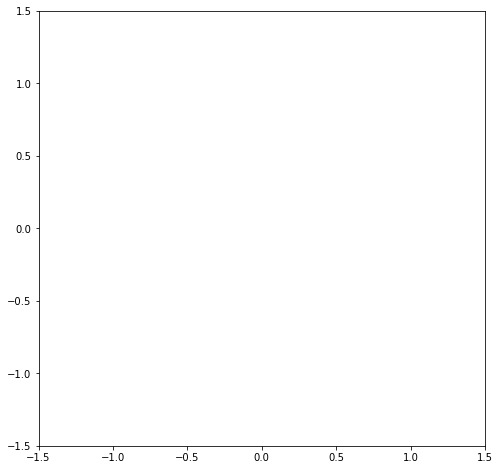

In [13]:
animate_roots(coeffs)

### Fractional Antiderivative

$\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k+a} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1+a} + \cdots + c_0 x^a + C$

$x^a (\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1} + \cdots + c_0 x + C)$

$x^a (\sum_{i=0}^{k} \frac{\Gamma(k-i)}{\Gamma(k-i+a)} c_{k-i} x^{k-i} + C)$

Let $G_{k,a} = \frac{\Gamma(k)}{\Gamma(k+a)}$, then 

$x^a (\sum_{i=0}^{k} G_{k-i,a} c_{k-i} x^{k-i} + C)$

**Newton Integration**

1) Construct the companion matrix of the polynomial $P$ to be solved.

2) Differentiate down to a polynomial $P_n$ whose roots are known.

3) Compute a function $P_{n-1}$ to be optimized by using a fractional antiderivative with step size $a$ (use chebyshev nodes)

4) Use newton's method to find the roots of the function $P_{n-1}$ using the roots of $P_n$ as the guess

5) Repeat steps 3 and 4 by update solution by finding the roots of $P_{n-i}$ from roots of $P_{n-i+1}$

In [ ]:
coeffs = np.random.randn(6)
coeffs[-1] = 1.

P = np.polynomial.polynomial.Polynomial(coeffs)
R = P.roots()
plt.scatter(R.real,R.imag,color='k')

dP = P.deriv(m=P.degree()-1)
dR = dP.roots()
plt.scatter(dR.real,dR.imag,color='r')

R_approx = newton_integration(coeffs,5)

for r in R_approx[-1]:
    plt.scatter(r.real,r.imag,color='orange',alpha=.3)


plt.show()

convert to chebyshev, 2d polynomial roots visualization, newton integration

probably should build a fractional integration function (or modify frac_deriv to do such)

Ya Jing